## Import `face` dataset

In [4]:
# try to import "face" dataset from scipy with scipy 1.10 is the minimum supported version

try:
    from scipy.datasets import face
except ImportError:
    from scipy.misc import face

img = face()

In [5]:
# type of img
type(img)

numpy.ndarray

## Display the image

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

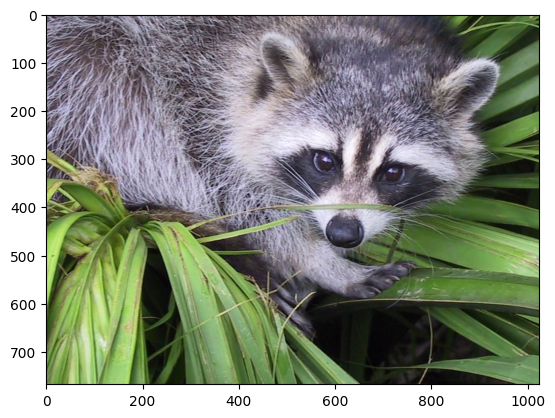

In [7]:
plt.imshow(img)
plt.show()

## Image properties

In [ ]:
# Image shape
img.shape

(768, 1024, 3)

In [9]:
# Image dimensions
img.ndim

3

In [10]:
# The red pixel data for the image
img[:, :, 0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]],
      shape=(768, 1024), dtype=uint8)

In [11]:
img_array = img/255

red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

## Operations on the image

In [12]:
from numpy import linalg

In [16]:
# the gray scale version of the image
img_gray = img_array @ [0.2989, 0.5870, 0.1140]

In [17]:
# shape of the gray scale image
img_gray.shape

(768, 1024)

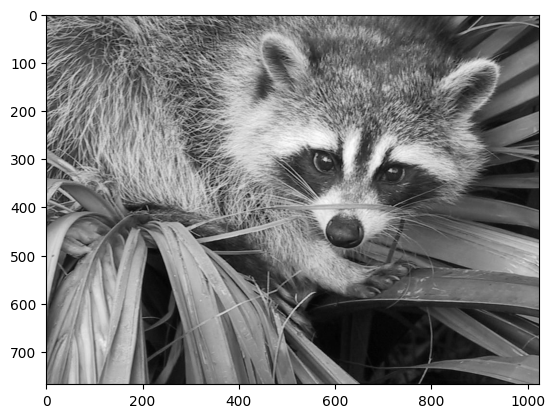

In [18]:
# display the image using matplotlib
plt.imshow(img_gray, cmap='gray')
plt.show()

In [19]:
# decompose the image using SVD
U, s, vt = linalg.svd(img_gray)

In [20]:
# shape of the results matrices
U.shape, s.shape, vt.shape

((768, 768), (768,), (1024, 1024))

In [21]:
import numpy as np

# Rebuild the diagonal matrix from the vector s
Sigma = np.zeros((U.shape[0], vt.shape[0]))
np.fill_diagonal(Sigma, s)

## Approximation

In [22]:
# norm of the rebuilt matrix
linalg.norm(img_gray - U @ Sigma @ vt)

np.float64(1.19989270625659e-12)

In [24]:
# check that the rebuilt matrix is close to the original
np.allclose(img_gray, U @ Sigma @ vt)

True

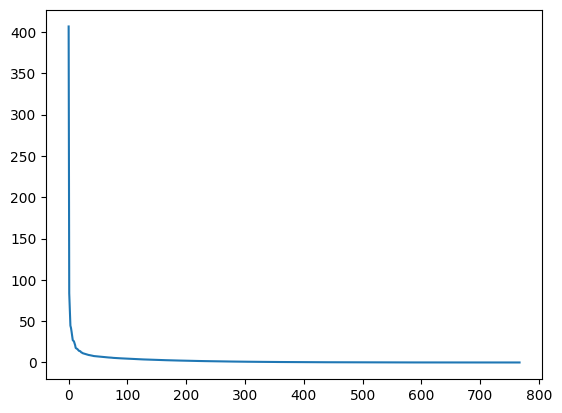

In [25]:
# check if the approximation is reasonable
plt.plot(s)
plt.show()

In [26]:
# Experiment with k
k = 10
approx = U @ Sigma[:, :k] @ vt[:k, :]

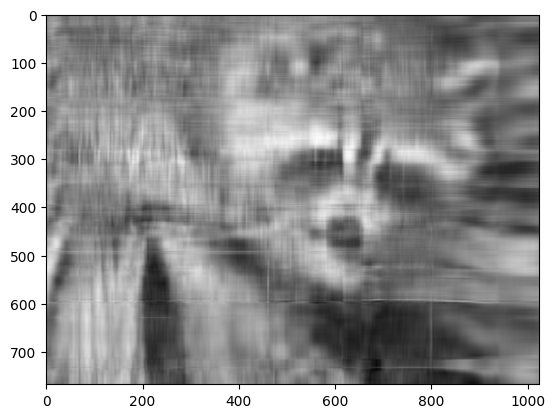

In [27]:
plt.imshow(approx, cmap='gray')
plt.show()

In [30]:
# Transpose the image array to have the color channel first
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 768, 1024)

In [31]:
# decompose the transposed image using SVD
U, s, vt = linalg.svd(img_array_transposed)
U.shape, s.shape, vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [32]:
# Rebuild the Sigma array for all three color channels
Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])


In [33]:
# Rebuild the original image
reconstructed = U @ Sigma @ vt
reconstructed.shape

(3, 768, 1024)

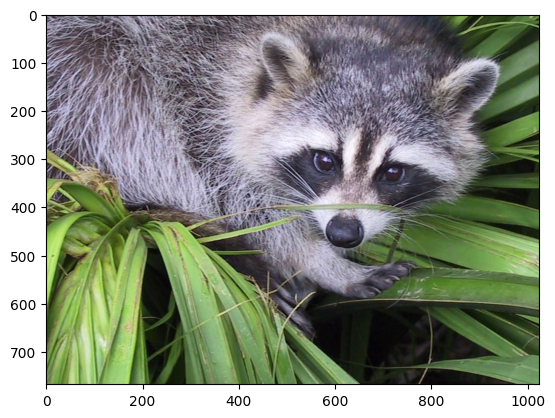

In [34]:
# Clip values to be in the valid range [0, 1] and transpose back to original shape
reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show()

In [36]:
# Experiment with k for color image
approx_img = U @ Sigma[..., :k] @ vt[..., :k, :]
approx_img.shape

(3, 768, 1024)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13567131472460855..1.0794536079155876].


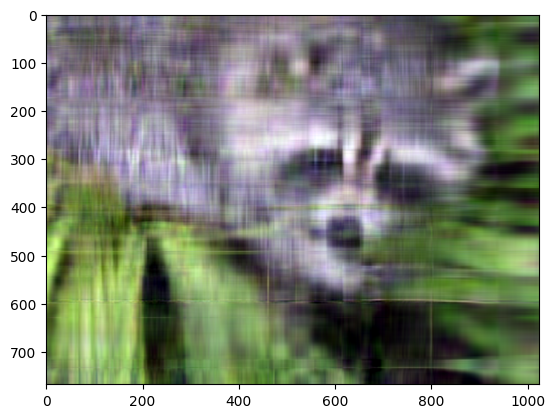

In [37]:
# display the approximated image
plt.imshow(np.transpose(approx_img, (1, 2, 0)))
plt.show()